In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
df=pd.read_csv("Clean_Dataset.csv")

In [9]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [13]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [15]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [17]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [19]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [23]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [25]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [33]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [39]:
df['duration'].min()

0.83

In [44]:
df['duration'].max()

49.83

PREPROCESSING

In [48]:
#drop the unnecessary columns
df=df.drop('Unnamed: 0',axis=1)
df=df.drop('flight',axis=1)

In [50]:
#CODING THE COLUMNS
df['class']=df['class'].apply(lambda x: 1 if x== 'Business' else 0)

In [52]:
df.stops=pd.factorize(df.stops)[0]

In [54]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [81]:
df=df.join(pd.get_dummies(df.airline, dtype=int, prefix='airline')).drop('airline',axis=1)
df=df.join(pd.get_dummies(df.source_city, dtype=int, prefix='source')).drop('source_city',axis=1)
df=df.join(pd.get_dummies(df.departure_time, dtype=int, prefix='departure')).drop('departure_time',axis=1)
df=df.join(pd.get_dummies(df.arrival_time, dtype=int, prefix='arrival')).drop('arrival_time',axis=1)
df=df.join(pd.get_dummies(df.destination_city, dtype=int, prefix='dest')).drop('destination_city',axis=1)

In [83]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,dest_Bangalore,dest_Chennai,dest_Delhi,dest_Hyderabad,dest_Kolkata,dest_Mumbai
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


TRAINING REGRESSION MODEL

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [92]:
X,y=df.drop('price',axis=1),df.price

In [94]:
X

,stops,class,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,dest_Bangalore,dest_Chennai,dest_Delhi,dest_Hyderabad,dest_Kolkata,dest_Mumbai
0,0,0,2.17,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,2.33,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,2.17,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,2.25,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2.33,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
300149,1,1,10.42,49,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
300150,1,1,13.83,49,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
300151,1,1,10.00,49,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [96]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [109]:
reg=RandomForestRegressor(n_jobs=1)

reg.fit(X_train,y_train)

RandomForestRegressor(n_jobs=1)

In [110]:
reg.score(X_test,y_test)

0.9858717694212229

In [116]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


y_pred=reg.predict(X_test)

print('R2:', r2_score(y_test,y_pred))
print('MAD:', mean_absolute_error(y_test,y_pred))
print('RMSE:', mean_squared_error(y_test,y_pred))

R2: 0.9858717694212229
MAD: 1056.0829187479567
RMSE: 7233911.183145313


Text(0.5, 1.0, 'Actual Vs Predicted Price')

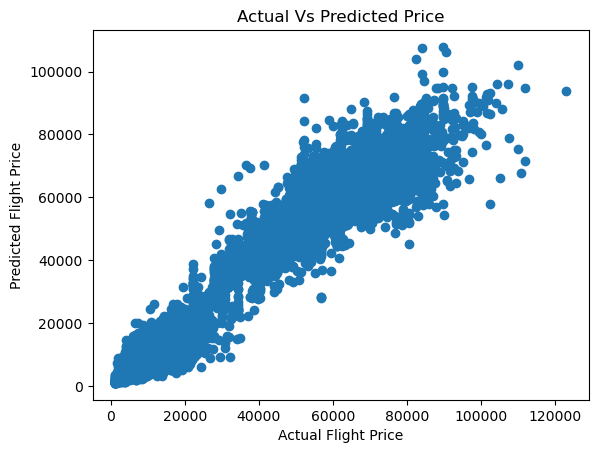

In [118]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Actual Vs Predicted Price')

In [128]:
importances=dict(zip(reg.feature_names_in_,reg.feature_importances_))
sorted_importance=sorted(importances.items(), key= lambda x:x[1], reverse=True)
sorted_importance

[('class', 0.8796842723802409),
 ('duration', 0.057818749920150354),
 ('days_left', 0.018514051086294545),
 ('airline_Air_India', 0.004981061034932279),
 ('airline_Vistara', 0.004956473773548213),
 ('source_Delhi', 0.003751325683261708),
 ('dest_Delhi', 0.003302721913878239),
 ('source_Mumbai', 0.0022317797763586993),
 ('dest_Mumbai', 0.0019408768458696458),
 ('stops', 0.0019048789897947631),
 ('dest_Kolkata', 0.0018283738739879305),
 ('source_Kolkata', 0.0017665007153482401),
 ('arrival_Evening', 0.0015867580495545896),
 ('dest_Hyderabad', 0.0014719306820431917),
 ('dest_Bangalore', 0.0013315862918828834),
 ('source_Hyderabad', 0.0012380876381475564),
 ('arrival_Night', 0.0011333497315511895),
 ('source_Bangalore', 0.00111939738920802),
 ('departure_Evening', 0.0011095002405200705),
 ('arrival_Afternoon', 0.0010191311157164815),
 ('source_Chennai', 0.0008949390024579786),
 ('dest_Chennai', 0.0008725391466909528),
 ('departure_Morning', 0.0008693261591593364),
 ('departure_Early_Mornin

<BarContainer object of 10 artists>

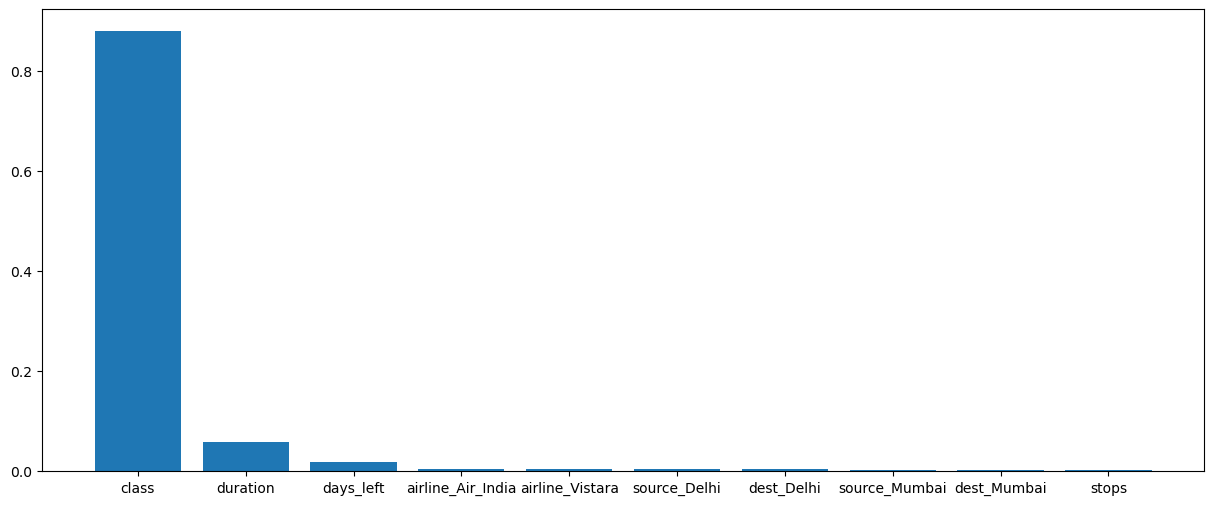

In [136]:
plt.figure(figsize=(15,6))
plt.bar([x[0] for x in sorted_importance[:10]], [x[1] for x in sorted_importance[:10]])

In [ ]:
from sklearn.model_selection import GridSearchCV
reg=RandomForestRegression(n_jobs=-1)
param_grif={
    'n_estimators': [100,200,300],
    'max_depth':[None,10,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto','sqrt']
}

grid_search=GridSearchCV(reg,param_grid,cv=5)
grid_search.fit(X_train,y_train)

best_params=grid_search.best_params_

In [148]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist={
    'n_estimators': randint(100,300),
    'max_depth':[None,10,20,30,40,50],
    'min_samples_split':randint(2,11),
    'min_samples_leaf':randint(1,5),
    'max_features':[1.0,'auto','sqrt']
}
reg=RandomForestRegressor(n_jobs=-1)
random_search=RandomizedSearchCV(estimator=reg,param_distributions=param_dist,n_iter=2,cv=3,
                                 scoring='neg_mean_squared_error',verbose=2,random_state=10,n_jobs=-1)
random_search.fit(X_train,y_train)
best_regressor=random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


C:\Users\peddisanjana\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\peddisanjana\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\peddisanjana\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\peddisanjana\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\peddisanj

In [151]:
best_regressor.score(X_test,y_test)

0.9866984460575183

In [152]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


y_pred=best_regressor.predict(X_test)

print('R2:', r2_score(y_test,y_pred))
print('MAD:', mean_absolute_error(y_test,y_pred))
print('RMSE:', mean_squared_error(y_test,y_pred))

R2: 0.9866984460575183
MAD: 1072.0017203478699
RMSE: 6810637.700256014
